# Gansu Earthquake published on BBC NEWS with Corpus Analysis

# # Introduction

When it comes to natural calamities,the seismic tremors that shake the earth's foundation not only leave physical scars on the affected regions but also reverberate throughout human history.The Earthquake, which occurred in the Chinese region of Gansu, with its epicenter in Dingxi, unfolded on 2023-12-19, leaving a trail of destruction and sorrow in its wake.  In the aftermath of this devastating event, understanding the nuanced portrayal of the international community's response is crucial in unraveling the complexities surrounding disaster management and global cooperation. These articles, meticulously selected to capture the immediate and evolving narratives surrounding the catastrophe, serve as windows into the reporting, analysis, and human stories that emerged in the wake of this natural disaster.

# #Research Question

This corpus analysis project endeavors to explore the language employed in three selected news articles from BBC News, shedding light on the intricate ways in which the international community's response to the Gansu Earthquake is portrayed. The central research question guiding this investigation is: "In what ways does the language in the articles portray the international community's response to the Gansu Earthquake?"
With the use of natural language processing methods—spaCy, this research attempts to break out the linguistic components that are embedded in the articles.The analysis aims to identify the nuanced details and overall themes that underlie the portrayal of global efforts following the Gansu Earthquake.
The choice of BBC News as the primary source ensures a globally informed perspective, providing a comprehensive understanding of how the language employed in media narratives contributes to shaping perceptions of the international community's role in disaster response. This investigation not only contributes to the discourse on media representation but also offers insights into the dynamics of global collaboration during times of crisis.
The final objective of this investigation is to unravel the linguistic tapestry weaved through these pieces in order to gain a deeper comprehension of how language influences and reflects how we perceive the global community's response to the Gansu Earthquake. By using this lens, we hope to add to the larger discussion on media influence, crisis communication, and how language shapes our view of world events as a collective.

In [1]:
!pip install nbformat --upgrade

In [2]:
# Import spacy
import spacy

# Install English language model
!spacy download en_core_web_sm

# Import os to upload documents and metadata
import os

# Load spaCy visualizer
from spacy import displacy

# Import pandas DataFrame packages
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'

# Import graphing package
import plotly.graph_objects as go
import plotly.express as px

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 13.6 MB/s eta 0:00:0000:0100:01
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [52]:
#Create empty lists for file names and contents
texts = []
file_names = []

# Iterate through each file in the folder
for _file_name in os.listdir('txt_files'):
# Look for only text files
    if _file_name.endswith('.txt'):
    # Append contents of each text file to text list
        texts.append(open('txt_files' + '/' + _file_name, 'r',encoding='utf-8').read())
        # Append name of each file to file name list
        file_names.append(_file_name)

In [53]:
# Create dictionary object associating each file name with its text
d = {'Filename':file_names,'Text':texts}

In [54]:
# Turn dictionary into a dataframe
paper_df = pd.DataFrame(d)

In [55]:
paper_df.head()

,Filename,Text
0,BBC-Gansu1.txt,Rescuers search for survivors as China earthqu...
1,BBC-Gansu2.txt,Gansu earthquake: Over 120 killed in China's d...
2,BBC-Gansu3.txt,Gansu earthquake: Authorities nearing end of r...


In [56]:
# Remove extra spaces from papers
paper_df['Text'] = paper_df['Text'].str.replace('\s+', ' ', regex=True).str.strip()
paper_df.head()

,Filename,Text
0,BBC-Gansu1.txt,Rescuers search for survivors as China earthqu...
1,BBC-Gansu2.txt,Gansu earthquake: Over 120 killed in China's d...
2,BBC-Gansu3.txt,Gansu earthquake: Authorities nearing end of r...


In [57]:
# Load metadata.
metadata_df = pd.read_csv('metadata.csv')
metadata_df.head()

,NewsID,PublishedDate,Author,title,Authority
0,BBC-Gansu1,2023/12/19,UNKNOWN,Rescuers search for survivors as China earthqu...,BBC NEWS
1,BBC-Gansu2,2023/12/19,Frances Mao & Christy Cooney,Gansu earthquake- Over 120 killed in China's d...,BBC NEWS
2,BBC-Gansu3,2023/12/20,Frances Mao,Gansu earthquake- Authorities nearing end of r...,BBC NEWS


In [62]:
# Remove .txt from title of each paper
paper_df['Filename'] = paper_df['Filename'].str.replace('.txt', '', regex=True)
# Rename column from  NewsID to Title
metadata_df.rename(columns={"NewsID": "Filename"}, inplace=True)

In [63]:
final_paper_df = metadata_df.merge(paper_df,on='Filename')

In [64]:
# Print DataFrame
final_paper_df.head()

,Filename,PublishedDate,Author,title,Authority,Text
0,BBC-Gansu1,2023/12/19,UNKNOWN,Rescuers search for survivors as China earthqu...,BBC NEWS,Rescuers search for survivors as China earthqu...
1,BBC-Gansu2,2023/12/19,Frances Mao & Christy Cooney,Gansu earthquake- Over 120 killed in China's d...,BBC NEWS,Gansu earthquake: Over 120 killed in China's d...
2,BBC-Gansu3,2023/12/20,Frances Mao,Gansu earthquake- Authorities nearing end of r...,BBC NEWS,Gansu earthquake: Authorities nearing end of r...


In [65]:
final_paper_df.shape

(3, 6)

In [66]:
# Load nlp pipeline
nlp = spacy.load('en_core_web_sm')

# Check what functions it performs
print(nlp.pipe_names)

['tok2vec', 'tagger', 'parser', 'attribute_ruler', 'lemmatizer', 'ner']


In [67]:
#Define example sentence
sentence = "This is 'an' example? sentence"

# Call the nlp model on the sentence
doc = nlp(sentence)

In [68]:
# Loop through each token in doc object
for token in doc:
    # Print text and part of speech for each
    print(token.text, token.pos_)

This PRON
is AUX
' PUNCT
an DET
' PUNCT
example NOUN
? PUNCT
sentence NOUN


In [69]:
# Define a function that runs the nlp pipeline on any given input text
def process_text(text):
    return nlp(text)

In [70]:
# Apply the function to the "Text" column, so that the nlp pipeline is called on each student essay
final_paper_df['Doc'] = final_paper_df['Text'].apply(process_text)

In [71]:
# Define a function to retrieve tokens from a doc object
def get_token(doc):
    return [(token.text) for token in doc]

In [72]:
# Run the token retrieval function on the doc objects in the dataframe
final_paper_df['Tokens'] = final_paper_df['Doc'].apply(get_token)
final_paper_df.head()

,Filename,PublishedDate,Author,title,Authority,Text,Doc,Tokens
0,BBC-Gansu1,2023/12/19,UNKNOWN,Rescuers search for survivors as China earthqu...,BBC NEWS,Rescuers search for survivors as China earthqu...,"(Rescuers, search, for, survivors, as, China, ...","[Rescuers, search, for, survivors, as, China, ..."
1,BBC-Gansu2,2023/12/19,Frances Mao & Christy Cooney,Gansu earthquake- Over 120 killed in China's d...,BBC NEWS,Gansu earthquake: Over 120 killed in China's d...,"(Gansu, earthquake, :, Over, 120, killed, in, ...","[Gansu, earthquake, :, Over, 120, killed, in, ..."
2,BBC-Gansu3,2023/12/20,Frances Mao,Gansu earthquake- Authorities nearing end of r...,BBC NEWS,Gansu earthquake: Authorities nearing end of r...,"(Gansu, earthquake, :, Authorities, nearing, e...","[Gansu, earthquake, :, Authorities, nearing, e..."


In [80]:
tokens = final_paper_df[['Text', 'Tokens']].copy()
tokens.head()

,Text,Tokens
0,Rescuers search for survivors as China earthqu...,"[Rescuers, search, for, survivors, as, China, ..."
1,Gansu earthquake: Over 120 killed in China's d...,"[Gansu, earthquake, :, Over, 120, killed, in, ..."
2,Gansu earthquake: Authorities nearing end of r...,"[Gansu, earthquake, :, Authorities, nearing, e..."


In [81]:
# Get all NE labels and assign to variable
labels = nlp.get_pipe("ner").labels

# Print each label and its description
for label in labels:
    print(label + ' : ' + spacy.explain(label))

CARDINAL : Numerals that do not fall under another type
DATE : Absolute or relative dates or periods
EVENT : Named hurricanes, battles, wars, sports events, etc.
FAC : Buildings, airports, highways, bridges, etc.
GPE : Countries, cities, states
LANGUAGE : Any named language
LAW : Named documents made into laws.
LOC : Non-GPE locations, mountain ranges, bodies of water
MONEY : Monetary values, including unit
NORP : Nationalities or religious or political groups
ORDINAL : "first", "second", etc.
ORG : Companies, agencies, institutions, etc.
PERCENT : Percentage, including "%"
PERSON : People, including fictional
PRODUCT : Objects, vehicles, foods, etc. (not services)
QUANTITY : Measurements, as of weight or distance
TIME : Times smaller than a day
WORK_OF_ART : Titles of books, songs, etc.


In [82]:
entities = []
for doc in final_paper_df['Doc']:
    entities.append([(ent.text, ent.label_) for ent in doc.ents])

final_paper_df['Entities'] = entities

In [83]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()

# Calculate sentiment scores for each article
sentiment_scores = final_paper_df['Text'].apply(lambda x: analyzer.polarity_scores(x))
final_paper_df['Sentiment'] = sentiment_scores

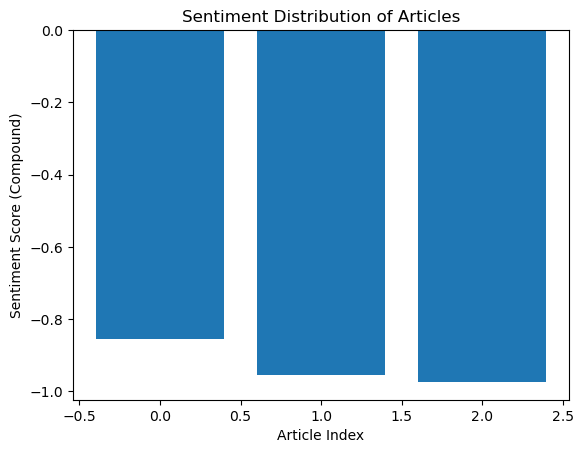

In [84]:
import matplotlib.pyplot as plt

# Plotting sentiment distribution
plt.bar(final_paper_df.index, final_paper_df['Sentiment'].apply(lambda x: x['compound']))
plt.xlabel('Article Index')
plt.ylabel('Sentiment Score (Compound)')
plt.title('Sentiment Distribution of Articles')
plt.show()

In [85]:
for i, row in final_paper_df.iterrows():
    print(f"Article {i+1} Entities: {row['Entities']}")
    print(f"Context: {row['Doc'].text}")
    print()

Article 1 Entities: [('China', 'GPE'), ('100', 'CARDINAL'), ('December 2023', 'DATE'), ('At least 111', 'CARDINAL'), ('more than 250', 'CARDINAL'), ('5.9', 'CARDINAL'), ('Gansu', 'GPE'), ('north-west', 'GPE'), ('China', 'GPE'), ('China', 'GPE'), ('Xi Jinping', 'PERSON'), ('second', 'ORDINAL'), ('Xinjiang', 'GPE')]
Context: Rescuers search for survivors as China earthquake kills 100 19 December 2023 Summary * At least 111 people have been killed and more than 250 injured in the 5.9 magnitude quake that struck rural Gansu province in north-west China * Rescuers are braving freezing weather - with temperatures below -13C - to search for survivors * The government has dispatched teams of rescue workers to assist local emergency crews * China's leader Xi Jinping has ordered full rescue efforts * Power and water supplies have been disrupted in parts of the region * A second quake has been reported in Xinjiang province

Article 2 Entities: [('Gansu', 'GPE'), ('China', 'GPE'), ('19 December 20

In [86]:
# Save DataFrame as csv (in Google Drive)
# Use this step only to save  csv to your computer's working directory
final_paper_df.to_csv('MICUSP_papers_with_spaCy_tags.csv')

## Conclusion

### Central Role of China and Xi Jinping:
The language consistently emphasizes the central role of China, with frequent mentions of "China" as a named entity.
Chinese President Xi Jinping is prominently featured in all articles, highlighting his direct involvement in coordinating and ordering rescue efforts.

### Diverse Ethnic Makeup and Regional Impact:
The articles highlight the diverse ethnic makeup of the affected regions, including mentions of Tibetan, Mongolian, and Muslim groups.
The earthquake's impact is discussed across different provinces (e.g., Xinjiang, Qinghai, Yunnan), emphasizing its regional significance.

### Comparison Across Articles:
The articles share common themes in terms of China's internal response, but they provide additional details and context in each iteration.
The language in each article contributes to a broader narrative of the evolving situation and response to the earthquake.

While the analysis provides valuable insights into how the language portrays the international community's response, it is important to note that the focus remains primarily on China's internal efforts. The narrative emphasizes the government's leadership, regional impact, and the diverse communities affected. To delve deeper into the international community's role, further analysis of additional sources and perspectives may be warranted.